# Machine Learning Analysis of Heart Disease Indicators

### Purpose of the project: 
To understand anayze various risk factors for heart disease (BMI, Alcoholism, Sex, etc.)


In [1]:
import numpy as np
import pandas as pd 
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
heart_disease= pd.read_csv("heart_2020_cleaned.csv")
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#one-hot enconding the categorical data into numerical
column_yes_no = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
heart_disease[column_yes_no] = heart_disease[column_yes_no].apply(lambda x: x.map({'Yes':1,'No':0}))
#Changing Male Sex to 1 and Female Sex to 0
column_1_0=["Sex"]
heart_disease[column_1_0] = heart_disease[column_1_0].apply(lambda x: x.map({'Male':1,'Female':0}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0.0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1.0,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0.0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0.0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0.0,0,Good,12.0,0,0,0


In [4]:
heart_disease['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [5]:
len(heart_disease['Race'].value_counts())

6

In [6]:
column_Race=["Race"]
heart_disease[column_Race] = heart_disease[column_Race].apply(lambda x: x.map({'White':0,'Hispanic':1,'Black':2, 'Other':3, 'American Indian/Alaskan Native':4}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,0.0,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,0.0,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,0.0,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,0.0,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,0.0,0.0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,1.0,1.0,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,1.0,0.0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,1.0,0.0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,1.0,0.0,0,Good,12.0,0,0,0


In [7]:
heart_disease['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [8]:
len(heart_disease['AgeCategory'].value_counts())

13

In [9]:
column_Age=["AgeCategory"]
heart_disease[column_Age] = heart_disease[column_Age].apply(lambda x: x.map({'18-24':0, '25-29':1,'30-34':2, '35-39':3, '40-44':4, '45-49':5,'50-54':6,'55-59':7, '60-64':8, '65-69':9,'75-79':10,'70-74':11,'80 or older':12}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0.0,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0.0,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0.0,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,10,0.0,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0.0,0.0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,1.0,1.0,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,1.0,0.0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,1.0,0.0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,1.0,0.0,0,Good,12.0,0,0,0


In [10]:
heart_disease['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [11]:
len(heart_disease['GenHealth'].value_counts())

5

In [12]:
column_health=["GenHealth"]
heart_disease[column_health] = heart_disease[column_health].apply(lambda x: x.map({'Excellent':0,'Very good':1,'Good':2, 'Fair':3, 'Poor':4}))
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0.0,1.0,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0.0,0.0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0.0,1.0,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,10,0.0,0.0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0.0,0.0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,1.0,1.0,0,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,1.0,0.0,1,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,1.0,0.0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,1.0,0.0,0,2,12.0,0,0,0


In [13]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              311727 non-null  float64
 11  Diabetic          310455 non-null  float64
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [14]:
heart_disease.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                 True
Diabetic             True
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [15]:
heart_disease.dropna(how='any', inplace=True)

In [16]:
heart_disease

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0.0,1.0,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0.0,0.0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0.0,1.0,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,10,0.0,0.0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0.0,0.0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,1.0,1.0,0,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,1.0,0.0,1,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,1.0,0.0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,1.0,0.0,0,2,12.0,0,0,0


In [17]:
#checking for an imbalance
# target count
heart_disease_count_0, heart_disease_count_1 = heart_disease['HeartDisease'].value_counts()

# Separate target 
hd_0 = heart_disease[heart_disease['HeartDisease'] == 0]
hd_1 = heart_disease[heart_disease['HeartDisease'] == 1]# print the shape of the class
print('Negative:', hd_0.shape)
print('Positive:', hd_1.shape)

Negative: (276603, 18)
Positive: (26220, 18)


Before undersampling: Counter({0: 276603, 1: 26220})


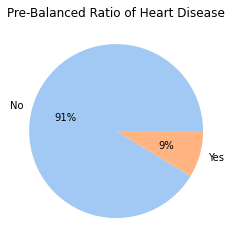

In [18]:
#plotting the imbalance
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Count classes and create pie chart
print(f'Before undersampling: {Counter(heart_disease["HeartDisease"])}')
plt.pie(heart_disease['HeartDisease'].value_counts(), labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%')
plt.title('Pre-Balanced Ratio of Heart Disease')
plt.show()

The pie chart indicates that the ratio of people who have or do not have heart diseases is very imbalanced. In the 302,823 observations, only 9% of people actually have cardiac diseases. If the algorithm was trained based on the original data, it is highly likely to create a model with extremely high accuracy, since the prediction tends to diagnose cases as negative and the majority of the data is also the negative case (HeartDisease = No).

In order to avoid the above-mentioned issue, one of the approaches is to ensure the percentage of the positive and negative cases is as similar as possible. In this case, we can either delete the negative samples or generate new synthetic samples as the following.

In [19]:
# !pip install imblearn

# #Random Under-Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data. But a drawback to undersampling is that we are removing information that may be valuable.

After undersampling: Counter({0: 52440, 1: 26220})


Text(0.5, 1.0, 'Post-Balanced Ratio of Heart Disease')

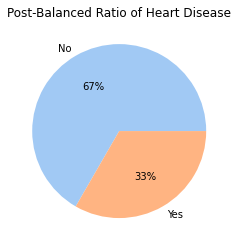

In [20]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy=0.5)
x = heart_disease.iloc[:, 1:] # Remove target variable
y = heart_disease['HeartDisease']
x_under, y_under = under_sampler.fit_resample(x, y)

# Count classes and create pie chart
print(f'After undersampling: {Counter(y_under)}')
plt.pie(y_under.value_counts(), labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%');
plt.title('Post-Balanced Ratio of Heart Disease')

In [21]:
# hd_0_under = hd_0.sample(26220)

# test_under = pd.concat([hd_0_under, hd_1], axis=0)

# print("Total Number of Positive and Negative:\n", test_under['HeartDisease'].value_counts())# plot the count after under-sampeling
# test_under['HeartDisease'].value_counts().plot(kind='bar', title='Number of Positve and Negative Cases')

In [22]:
# heart_disease['HeartDisease'].value_counts()
# heart_disease[heart_disease["HeartDisease"].values==1] #Combine in a stack with cell 48
# heart_disease[heart_disease["HeartDisease"].values==0].sample(26220)
#Training data #remove HD

In [23]:
# # Create data
X, y = x_under, y_under
target_names = ["Negative", "Positive"]

In [24]:
#prior to standardization you have to train test split
#Test size will be set to 0.25 if the training size is set to default. (25% test, 75% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler().fit(X_train)
#transform the data such that its distribution will have a mean value 0 and standard deviation of 1
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
#RandomForestClassifier classification report

# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples 
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82     13123
    Positive       0.64      0.60      0.62      6542

    accuracy                           0.75     19665
   macro avg       0.72      0.72      0.72     19665
weighted avg       0.75      0.75      0.75     19665

Training Score: 0.9965759810153403
Testing Score: 0.7529112636664124


In [26]:
#We use our model to make a prediction about whether the heart disease risk factors predict a person having heart disease or not given what it has learnt.
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)


array([[10865,  2258],
       [ 2601,  3941]], dtype=int64)

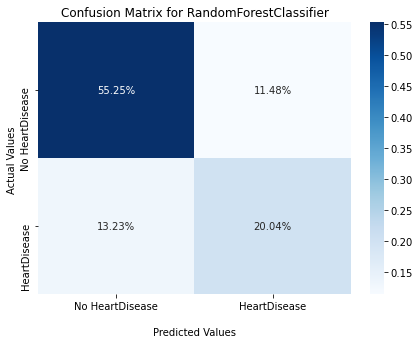

In [27]:
#RandomForestClassifier CM
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for RandomForestClassifier')

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [28]:
# Extra Trees classifier classification report

# This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) 
# on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    Negative       0.80      0.81      0.81     13123
    Positive       0.61      0.59      0.60      6542

    accuracy                           0.74     19665
   macro avg       0.71      0.70      0.70     19665
weighted avg       0.74      0.74      0.74     19665

Training Score: 0.9966437833714722
Testing Score: 0.7390287312484108


In [29]:
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[10676,  2447],
       [ 2685,  3857]], dtype=int64)

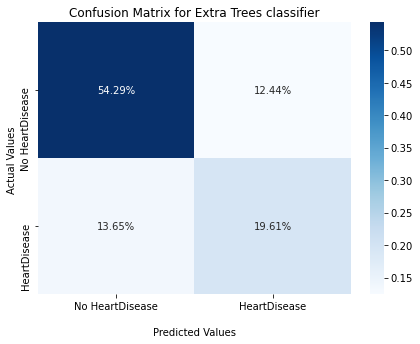

In [30]:
# Extra Trees classifier CM
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Extra Trees classifier')
plt.title

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [31]:
# AdaBoostClassifier classification report
# An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and 
# then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified 
# instances are adjusted such that subsequent classifiers focus more on difficult cases.
# This class implements the algorithm known as AdaBoost-SAMME [2].    
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
#Next, we construct and fit our model to the scaled training set.
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84     13123
    Positive       0.70      0.57      0.62      6542

    accuracy                           0.77     19665
   macro avg       0.75      0.72      0.73     19665
weighted avg       0.77      0.77      0.77     19665

Training Score: 0.7750317823544368
Testing Score: 0.7741164505466565


In [32]:
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[11523,  1600],
       [ 2842,  3700]], dtype=int64)

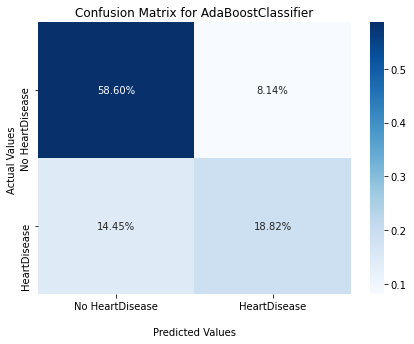

In [33]:
#AdaBoostClassifier CM
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for AdaBoostClassifier')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

# Best Model: AdaBoostClassifier

Although the Random Forest and Extremely Random models performed at an accuracy of ~75%, AdaBoost achieved a higher score of 77% through the ensemble learning from the basic Decision Tree models. Among all three models, we can conclude that the AdaBoost model is the best in terms of the best accuracy (77%) and precision (70%). 

## Random Forest &AdaBoost makes predictions by applying multiple decision trees to every sample and combining the predictions made by individual trees. However, rather than taking the average of the predictions made by each decision tree in the forest (or majority in the case of classification), in the AdaBoost algorithm, every decision tree contributes a varying amount to the final prediction.

In [44]:
 # AdaBoostClassifier classification report
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
#Next, we construct and fit our model to the scaled training set.
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84     13123
    Positive       0.70      0.57      0.62      6542

    accuracy                           0.77     19665
   macro avg       0.75      0.72      0.73     19665
weighted avg       0.77      0.77      0.77     19665

Training Score: 0.7750317823544368
Testing Score: 0.7741164505466565


In [45]:
y_true = y_test
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[11523,  1600],
       [ 2842,  3700]], dtype=int64)

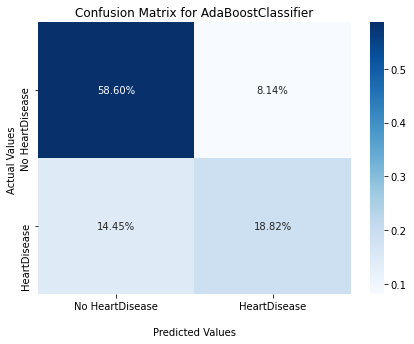

In [46]:
#AdaBoostClassifier CM
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for AdaBoostClassifier')
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

[0.06 0.02 0.02 0.04 0.04 0.02 0.02 0.04 0.4  0.04 0.02 0.   0.18 0.04
 0.02 0.02 0.02]


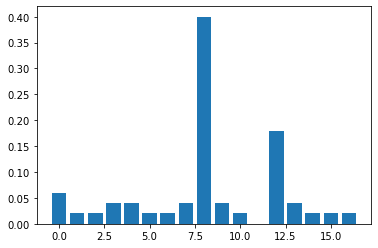

In [47]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [48]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False])

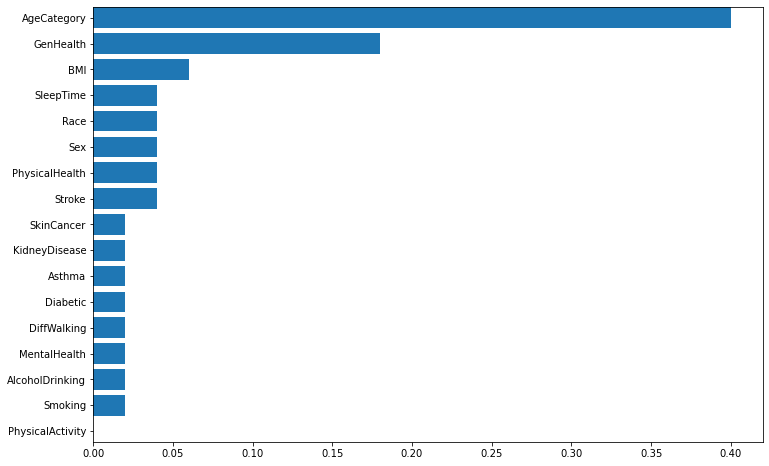

In [49]:
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(12,8)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [40]:
from sklearn.feature_selection import SelectFromModel

In [41]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [42]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9574709721162811
Testing Score: 0.703534197813374


In [43]:
# heart_disease.to_csv('heart_disease_encoded.csv', index=False)